In [1]:
import glob
import os
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from pyproj import Proj
import xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [2]:
dd = '212'
yyyymmdd = '20190731' #0824-RF0

In [3]:
hhmm = '0000' 

<xarray.Dataset>
Dimensions:                       (scan_lines_along_track_direction: 5500,
                                   pixel_elements_along_scan_direction: 5500,
                                   c: 5500, r: 5500)
Coordinates:
    latitude                      (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    longitude                     (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
Dimensions without coordinates: scan_lines_along_track_direction,
                                pixel_elements_along_scan_direction, c, r
Data variables: (12/26)
    cloud_mask                    (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    solar_zenith_angle            (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    sensor_zenith_angle           (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    relative_azimuth_angle        (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    scattering_angle              (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    glint_zenith_angle            (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    ...                            ...
    refl_0_65um_nom_stddev_3x3    (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    aerosol_fitting_error_muri    (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    angstrom_exponent_muri        (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    Cld_distance_03               (c, r) int8 ...
    Cld_distance_04               (c, r) int8 ...
    Cld_distance_05               (c, r) int8 ...
Attributes: (12/87)
    HDF_LIB_VERSION:                      unknown
    MACHINE:                              iris.ssec.wisc.edu
    PROGLANG:                             F90
    date_created:                         2020-09-22T21:57:54+00:00
    product_version:                      v05r04
    summary:                               To add
    ...                                   ...
    NUMBER_OF_SCANS_LEVEL1B:              5500
    NUMBER_OF_SCANS_LEVEL2:               5500
    PROCESSING_TIME_MINUTES:              30.787127
    NONCONFIDENT_CLOUD_MASK_FRACTION:     0.08547041
    ACHA_SUCCESS_FRACTION:                -999.0
    DCOMP_SUCCESS_FRACTION:               -999.0

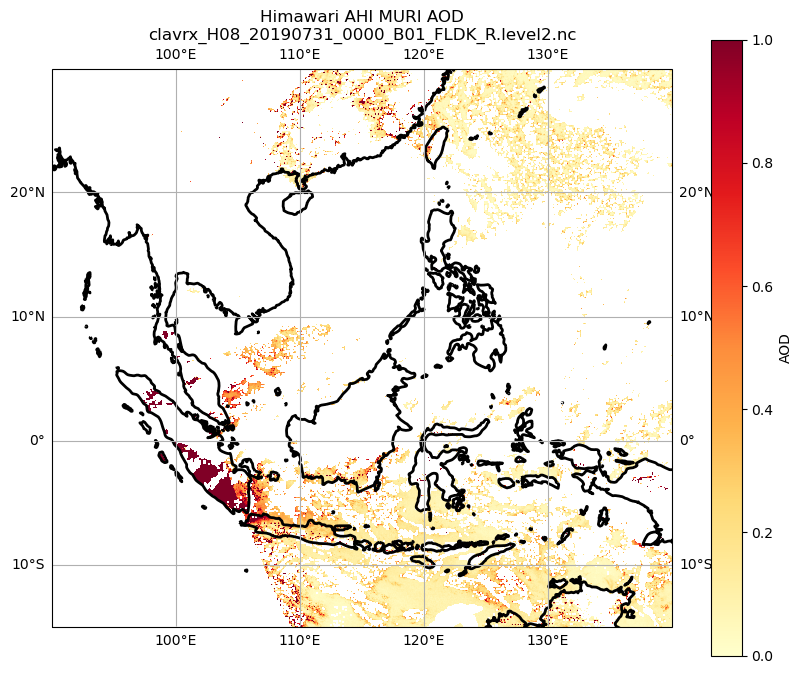

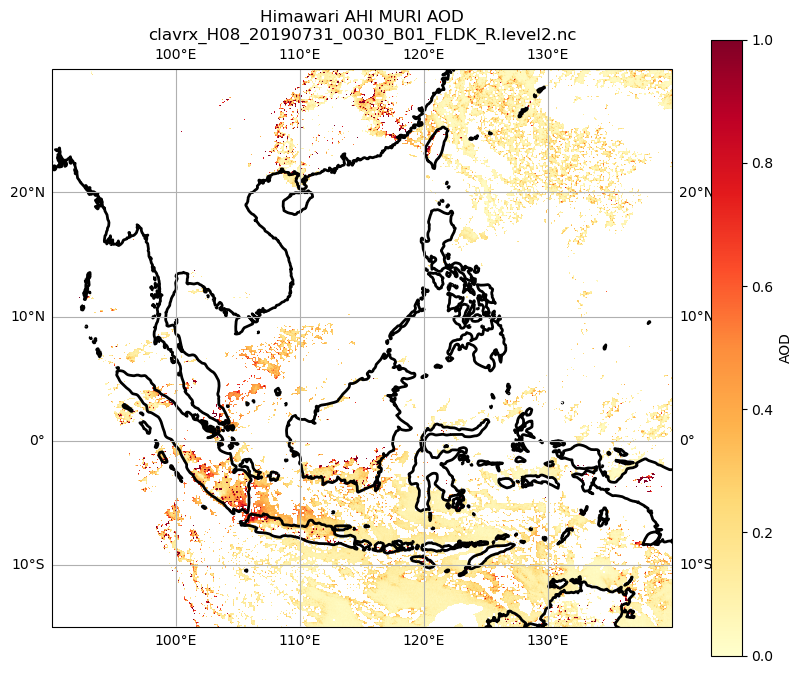

In [10]:
# Loop from 0 to 9990 with a step of 10
for i in range(0, 60, 30):
    # Format the number as a four-digit string
    hhmm = f"{i:04d}"
    
    FILE=f"/ships19/hercules/mino/Satellite_Out/HIM08/2019/level2/{dd}/v4/clavrx_H08_{yyyymmdd}_{hhmm}_B01_FLDK_R.level2.nc"

    C = xarray.open_dataset(FILE)
    description = C.attrs.get("FILENAME")
    aod = C['aerosol_optical_depth_muri'].data
    aod_clean = np.nan_to_num(aod, nan=0.0, posinf=0.0, neginf=0.0)
    

    geo_proj = ccrs.Geostationary(central_longitude=140.7, satellite_height=35786023.0)

    fig = plt.figure(figsize=(10, 8))
    pla_proj = ccrs.PlateCarree(central_longitude=140.7,)
    ax = plt.axes(projection=pla_proj)

    longitude_min = 90
    longitude_max = 140
    latitude_min = -15  # Adjust as necessary
    latitude_max = 30   # Adjust as necessary
    ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())
    extent = [-5500000, 5500000, -5500000, 5500000]
    ax.coastlines(resolution='50m', color='black', linewidth=2)
    plt.imshow(aod, transform=geo_proj, extent=extent, origin='upper', cmap='YlOrRd',  vmax=1, vmin=0)
    plt.colorbar(label='AOD')
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    plt.title(f'Himawari AHI MURI AOD\n{description}')
    plt.savefig(f"img/{description}_aod.png",dpi=300)


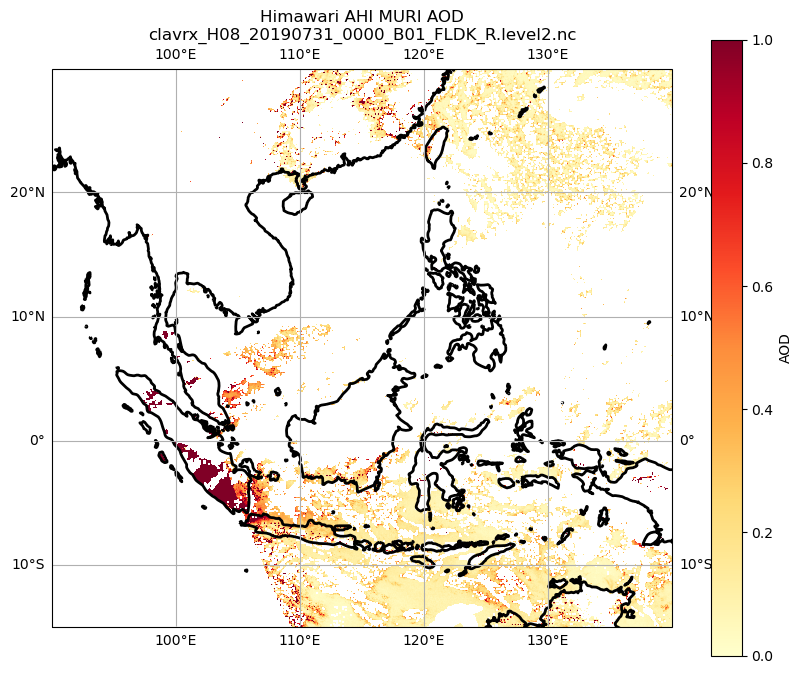

In [5]:

    FILE=f"/ships19/hercules/mino/Satellite_Out/HIM08/2019/level2/{dd}/v4/clavrx_H08_{yyyymmdd}_{hhmm}_B01_FLDK_R.level2.nc"

    C = xarray.open_dataset(FILE)
    description = C.attrs.get("FILENAME")
    aod = C['aerosol_optical_depth_muri'].data
    aod_clean = np.nan_to_num(aod, nan=0.0, posinf=0.0, neginf=0.0)

    geo_proj = ccrs.Geostationary(central_longitude=140.7, satellite_height=35786023.0)

    fig = plt.figure(figsize=(10, 8))
    pla_proj = ccrs.PlateCarree(central_longitude=140.7,)
    ax = plt.axes(projection=pla_proj)

    longitude_min = 90
    longitude_max = 140
    latitude_min = -15  # Adjust as necessary
    latitude_max = 30   # Adjust as necessary
    ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())
    extent = [-5500000, 5500000, -5500000, 5500000]
    ax.coastlines(resolution='50m', color='black', linewidth=2)
    plt.imshow(aod, transform=geo_proj, extent=extent, origin='upper', cmap='YlOrRd',  vmax=1, vmin=0)
    plt.colorbar(label='AOD')
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    plt.title(f'Himawari AHI MURI AOD\n{description}')
    plt.savefig(f"img/{description}_aod.png",dpi=300)


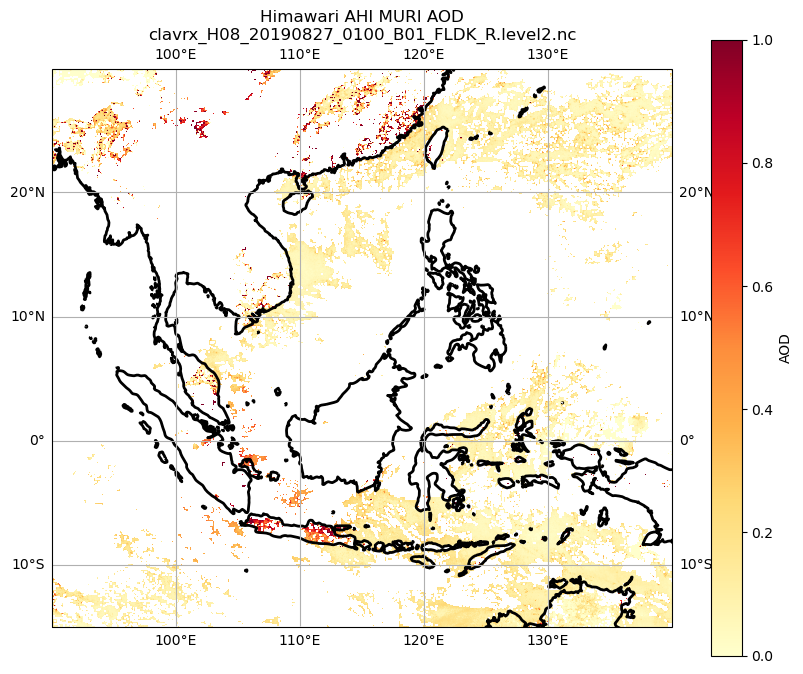

In [16]:
geo_proj = ccrs.Geostationary(central_longitude=140.7, satellite_height=35786023.0)

fig = plt.figure(figsize=(10, 8))
# Create a Cartopy axes using the PlateCarree
pla_proj = ccrs.PlateCarree(central_longitude=140.7,)
ax = plt.axes(projection=pla_proj)

# Set the extent of the plot to the desired longitude range
# Convert degrees to approximate meters for the extent values
longitude_min = 90
longitude_max = 140
latitude_min = -15  # Adjust as necessary
latitude_max = 30   # Adjust as necessary
ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())
# Set global extent (adjust if needed)
#ax.set_global()
# Geostationary projection extents in meters
extent = [-5500000, 5500000, -5500000, 5500000]
#extent = [longitude_min, longitude_max, latitude_min, latitude_max]

# Add coastlines and other features for reference
ax.coastlines(resolution='50m', color='black', linewidth=2)

plt.imshow(aod, transform=geo_proj, extent=extent, origin='upper', cmap='YlOrRd',  vmax=1, vmin=0)
plt.colorbar(label='AOD')
#cbar = plt.colorbar(ticks=[0, 1, 2, 3])
#cbar.ax.set_yticklabels(['Clear (0)', 'Probably Clear (1)', 'Probably Cloudy (2)', 'Cloudy (3)'])
# Optional: Add gridlines
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Show the plot
plt.title(f'Himawari AHI MURI AOD\n{description}')
plt.savefig(f"img/{description}_aod.png",dpi=300)


In [ ]:
geo_proj = ccrs.Geostationary(central_longitude=140.7, satellite_height=35786023.0)

fig = plt.figure(figsize=(10, 8))
# Create a Cartopy axes using the PlateCarree
pla_proj = ccrs.PlateCarree(central_longitude=140.7,)
ax = plt.axes(projection=pla_proj)

# Set the extent of the plot to the desired longitude range
# Convert degrees to approximate meters for the extent values
longitude_min = 90
longitude_max = 140
latitude_min = -15  # Adjust as necessary
latitude_max = 30   # Adjust as necessary
ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())
# Set global extent (adjust if needed)
#ax.set_global()
# Geostationary projection extents in meters
extent = [-5500000, 5500000, -5500000, 5500000]
#extent = [longitude_min, longitude_max, latitude_min, latitude_max]

# Add coastlines and other features for reference
ax.coastlines(resolution='50m', color='black', linewidth=2)

# Plot the cloud mask data
ax.scatter(df_SEA_code10["Longitude"], df_SEA_code10["Latitude"], c=df_SEA_code10["FRP"], cmap='Reds', s=15, marker='x',vmin=0,vmax=100,transform=ccrs.PlateCarree())
plt.imshow(M, transform=geo_proj, extent=extent, origin='upper', cmap='Blues_r',  vmax=3, vmin=0)
cbar = plt.colorbar(ticks=[0, 1, 2, 3])
cbar.ax.set_yticklabels(['Clear (0)', 'Probably Clear (1)', 'Probably Cloudy (2)', 'Cloudy (3)'])
# Optional: Add gridlines
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Show the plot
plt.title(f'Himawari AHI Cloud Mask\n{description}')
plt.savefig(f"img/{description}.png",dpi=300)


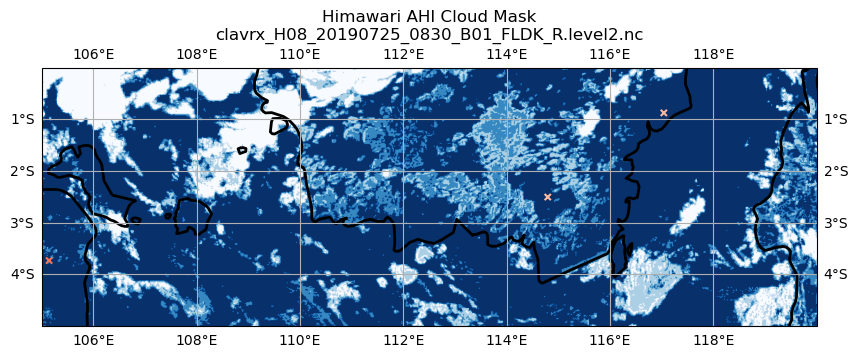

In [150]:
geo_proj = ccrs.Geostationary(central_longitude=140.7, satellite_height=35786023.0)

fig = plt.figure(figsize=(10, 8))
# Create a Cartopy axes using the PlateCarree
pla_proj = ccrs.PlateCarree(central_longitude=140.7,)
ax = plt.axes(projection=pla_proj)

# Set the extent of the plot to the desired longitude range
# Convert degrees to approximate meters for the extent values
longitude_min = 105
longitude_max = 120
latitude_min = -5  # Adjust as necessary
latitude_max = 0  # Adjust as necessary
ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())
# Set global extent (adjust if needed)
#ax.set_global()
# Geostationary projection extents in meters
extent = [-5500000, 5500000, -5500000, 5500000]
#extent = [longitude_min, longitude_max, latitude_min, latitude_max]

# Add coastlines and other features for reference
ax.coastlines(resolution='50m', color='black', linewidth=2)

# Plot the cloud mask data
ax.scatter(df_SEA_code10["Longitude"], df_SEA_code10["Latitude"], c=df_SEA_code10["FRP"], cmap='Reds', s=20, marker='x',vmin=0,vmax=100,transform=ccrs.PlateCarree())
plt.imshow(M, transform=geo_proj, extent=extent, origin='upper', cmap='Blues_r',  vmax=3, vmin=0)
#cbar = plt.colorbar(ticks=[0, 1, 2, 3])
#cbar.ax.set_yticklabels(['Clear (0)', 'Probably Clear (1)', 'Probably Cloudy (2)', 'Cloudy (3)'])
# Optional: Add gridlines
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Show the plot
plt.title(f'Himawari AHI Cloud Mask\n{description}')
plt.savefig(f"img/{description}_zoom.png",dpi=300)


In [5]:
df = ds['cloud_mask'].to_dataframe().reset_index()
df

df_ = df.dropna(subset=["latitude"])
df_

,scan_lines_along_track_direction,pixel_elements_along_scan_direction,latitude,longitude,cloud_mask
233692,42,2692,81.048615,133.059479,-128.0
233693,42,2693,80.952484,133.273727,-128.0
233694,42,2694,80.883820,133.460495,-128.0
233695,42,2695,80.826134,133.636276,-128.0
233696,42,2696,80.779442,133.806580,-128.0
...,...,...,...,...,...
30016303,5457,2803,-80.779442,147.589340,-128.0
30016304,5457,2804,-80.826134,147.754135,-128.0
30016305,5457,2805,-80.883820,147.929932,-128.0
30016306,5457,2806,-80.952484,148.122192,-128.0


In [14]:
df.dropna(subset=["latitude"])

#cloud_mask = -128 if no cloud

,scan_lines_along_track_direction,pixel_elements_along_scan_direction,latitude,longitude,cloud_mask
233692,42,2692,81.048615,133.059479,-128.0
233693,42,2693,80.952484,133.273727,-128.0
233694,42,2694,80.883820,133.460495,-128.0
233695,42,2695,80.826134,133.636276,-128.0
233696,42,2696,80.779442,133.806580,-128.0
...,...,...,...,...,...
30016303,5457,2803,-80.779442,147.589340,-128.0
30016304,5457,2804,-80.826134,147.754135,-128.0
30016305,5457,2805,-80.883820,147.929932,-128.0
30016306,5457,2806,-80.952484,148.122192,-128.0


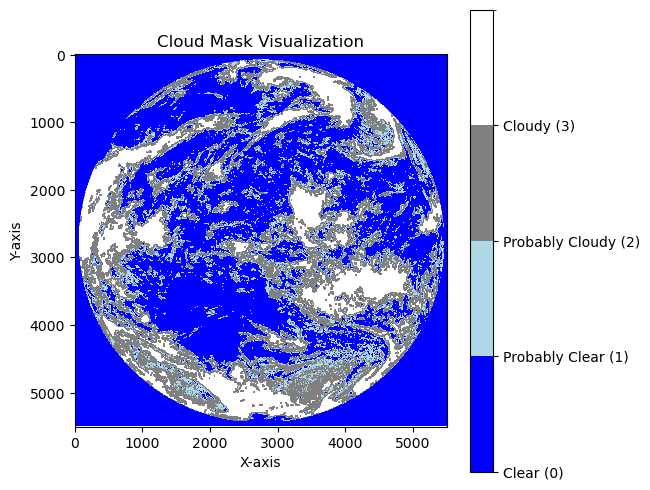

In [26]:
# Define a color map and normalization for categories 0, 1, 2, 3
cmap = mcolors.ListedColormap(['blue', 'lightblue', 'gray', 'white'])
bounds = [0, 1, 2, 3, 4]  # Values between 0 and 3
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Create the plot
plt.figure(figsize=(6, 6))
plt.imshow(ds.cloud_mask, cmap=cmap, norm=norm)

# Add color bar
cbar = plt.colorbar(ticks=[0, 1, 2, 3])
cbar.ax.set_yticklabels(['Clear (0)', 'Probably Clear (1)', 'Probably Cloudy (2)', 'Cloudy (3)'])

# Add title and labels
plt.title('Cloud Mask Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the plot
plt.show()